# Create Document Summarization Agents with Mistral OCR & CAMEL-AI 🐫

You can also check this cookbook in Colab [here](https://colab.research.google.com/drive/1ZwVmqa5vjpZ0C3H7k1XIseFfbCR4mq17?usp=sharing)

In this cookbook, we’ll explore [**Mistral OCR**](https://mistral.ai/news/mistral-ocr)—a state-of-the-art Optical Character Recognition API that understands complex document layouts and extracts text, tables, images, and equations with unprecedented accuracy. We’ll show you how to:

- Use the Mistral OCR API to convert scanned or image-based PDFs into structured Markdown
- Leverage a Mistral LLM agent within CAMEL to summarize and analyze the extracted content
- Build a seamless, end-to-end pipeline for retrieval-augmented generation (RAG), research, or business automation

## Table of Contents

1. 🧑🏻‍💻 Introduction
2. ⚡️ Step-by-step Guide: Mistral OCR Extraction
3. 💫 Quick Demo with Mistral Agent
4. 🧑🏻‍💻 Conclusion

<div style={{ display: "flex", justifyContent: "center", alignItems: "center", gap: "1rem", marginBottom: "2rem" }}>
  <a href="https://www.camel-ai.org/">
    <img src="https://i.postimg.cc/KzQ5rfBC/button.png" width="150" alt="CAMEL Homepage"/>
  </a>
  <a href="https://discord.camel-ai.org">
    <img src="https://i.postimg.cc/L4wPdG9N/join-2.png" width="150" alt="Join Discord"/>
  </a>
</div>  
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)</i>
</div>



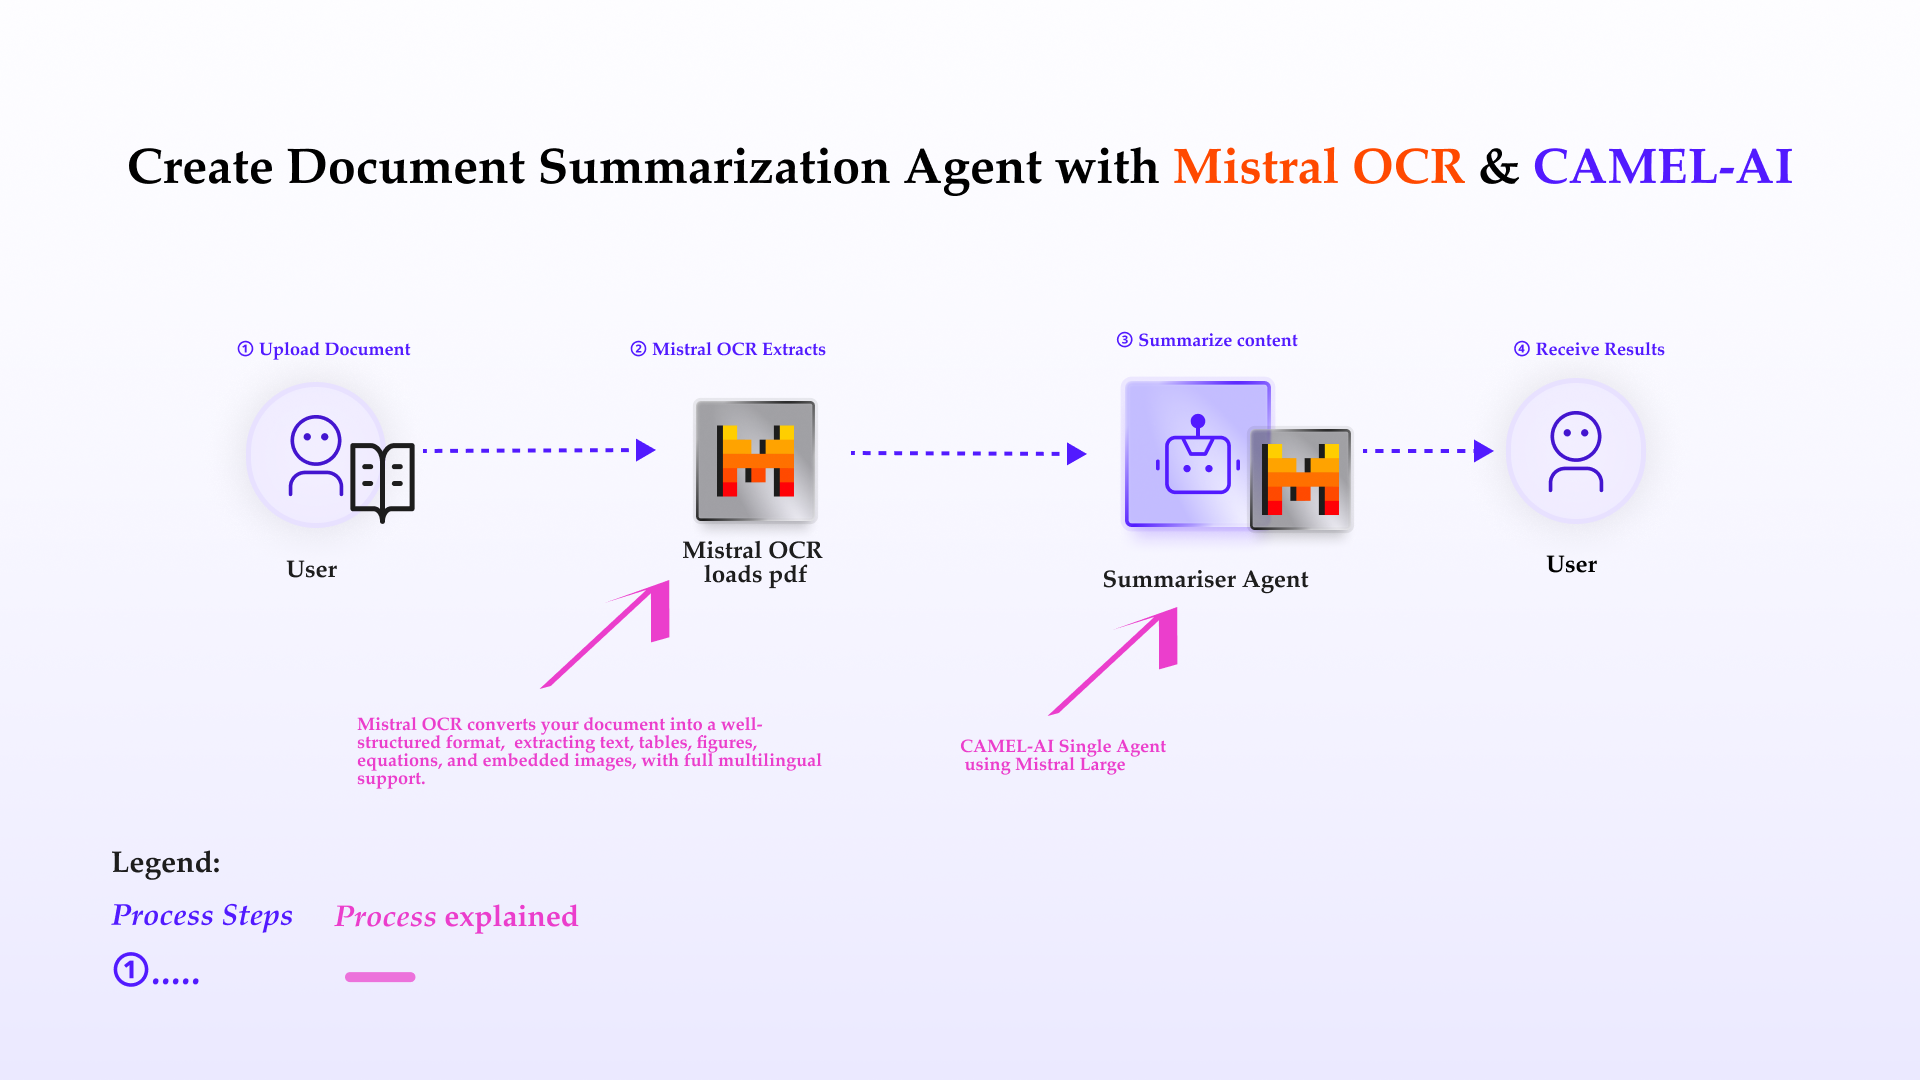

## **Introduction to Mistral OCR**

Throughout history, advancements in information abstraction and retrieval have driven human progress—from hieroglyphs to digitization. Today, over 90% of organizational data lives in documents, often locked in complex layouts and multiple languages. **Mistral OCR** ushers in the next leap in document understanding: a multimodal API that comprehends every element—text, images, tables, equations—and outputs ordered, structured Markdown with embedded media references.

#### **Key Features of Mistral OCR:**

1. **State-of-the-art complex document understanding**  
   - Extracts interleaved text, figures, tables, and mathematical expressions with high fidelity.

2. **Natively multilingual & multimodal**  
   - Parses scripts and fonts from across the globe, handling right-to-left layouts and non-Latin characters seamlessly.

3. **Doc-as-prompt, structured output**  
   - Returns ordered Markdown, embedding images and bounding-box metadata ready for RAG and downstream AI workflows.

4. **Top-tier benchmarks & speed**  
   - Outperforms leading OCR systems in accuracy—especially in math, tables, and multilingual tests—while delivering fast batch inference (∼2000 pages/min).

5. **Scalable & flexible deployment**  
   - Available via `mistral-ocr-latest` on Mistral’s developer suite, cloud partners, and on-premises self-hosting for sensitive data.

Ready to unlock your documents? Let’s dive into the extraction guide.


First, install the CAMEL package with all its dependencies.

In [ ]:
!pip install "camel-ai[all]==0.2.61"

## ⚡️ Step-by-step Guide: Mistral OCR Loader

**Step 1: Set up your Mistral API key**

If you don’t have a Mistral API key, you can obtain one by following these steps:

1. **Create an account:**  
   Go to [Mistral Console](https://console.mistral.ai/home) and sign up for an organization account.

2. **Get your API key:**  
   Once logged in, navigate to **Organization** → **API Keys**, generate a new key, copy it, and store it securely.


In [ ]:
import os
from getpass import getpass

mistral_api_key = getpass('Enter your Mistral API key: ')
os.environ['MISTRAL_API_KEY'] = mistral_api_key


**Step 2: Upload your PDF or image file for OCR**

In a Colab or Jupyter environment, you can upload any PDF file directly:


In [ ]:
# Colab file upload
from google.colab import files

uploaded = files.upload()
# Grab the first uploaded filename
file_path = next(iter(uploaded))

**Step 3: Import and initialize the Mistral OCR loader**

In [ ]:
# Importing the MistralReader class from the camel.loaders module
# This class handles document processing using Mistral OCR capabilities
from camel.loaders import MistralReader

# Initializing an instance of MistralReader
# This object will be used to submit tasks and manage OCR processing
mistral_reader = MistralReader()

## Step 4: Obtain OCR output from Mistral

Once the task completes, retrieve its output using the returned `task.id`.

The output of **Mistral OCR** is a structured object:


In [ ]:
# Retrieve the OCR output
# CORRECT: Just use extract_text for local files or URLs
ocr_response = mistral_reader.extract_text(file_path)
print(ocr_response)

## 💫 Quick Demo with CAMEL Agent

Here we choose Mistral model for our demo. If you'd like to explore different models or tools to suit your needs, feel free to visit the [CAMEL documentation page](https://docs.camel-ai.org/), where you'll find guides and tutorials.


If you don't have a Mistral API key, you can obtain one by following these steps:

1. Visit the Mistral Console (https://console.mistral.ai/)

2. In the left panel, click on API keys under API section

3. Choose your plan

For more details, you can also check the Mistral documentation: https://docs.mistral.ai/getting-started/quickstart/

In [ ]:
from camel.configs import MistralConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

mistral_model = ModelFactory.create(
    model_platform=ModelPlatformType.MISTRAL,
    model_type=ModelType.MISTRAL_LARGE,
    model_config_dict=MistralConfig(temperature=0.0).as_dict(),
)

# Use Mistral model
model = mistral_model

In [ ]:
from camel.agents import ChatAgent

# Initialize a ChatAgent
agent = ChatAgent(
    system_message="You are a helpful document assistant.",  # Define the agent's role
    model=mistral_model
)

# Use the ChatAgent to generate insights based on the OCR output
response = agent.step(
    f"Based on the following OCR-extracted content, give me a concise conclusion of the document:\n{ocr_response}"
)
print(response.msgs[0].content)

**For advanced usage of RAG capabilities with large files, please refer to our [RAG cookbook](https://docs.camel-ai.org/cookbooks/advanced_features/agents_with_rag#rag-cookbook).**

## 🧑🏻‍💻 Conclusion

In conclusion, integrating **Mistral OCR** within CAMEL-AI revolutionizes the process of document data extraction and preparation, enhancing your capabilities for AI-driven applications. With Mistral OCR’s robust features—state-of-the-art complex document understanding, natively multilingual & multimodal parsing, and doc-as-prompt structured Markdown output—you can seamlessly process complex PDFs and images into machine-readable formats optimized for LLMs, directly feeding into CAMEL-AI’s multi-agent workflows. This integration not only simplifies data preparation but also empowers intelligent and accurate analytics at scale. With these tools at your disposal, you’re equipped to transform raw document data into actionable insights, unlocking new possibilities in automation and AI-powered decision-making.


That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://colab.research.google.com/drive/1cmWPxXEsyMbmjPhD2bWfHuhd_Uz6FaJQ?usp=sharing)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on <a href="https://github.com/camel-ai/camel">Github</a> </i>, join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)  ⭐
</div>
